# Simulation: Subclassing Rebound

Here I've subclassed Rebound's Simulation class. The subclass allows for an easy interface with spacerocks for both input and output.

In [1]:
from spacerocks import SpaceRock, Units
from spacerocks.simulation import Simulation, PerturberModel

from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Define a function that will run at each integration epoch (NOT a heartbeat function)

In [2]:
def callback(sim):
    for n in sim.remaining_testparticles:
        p = sim.particles[n]
        if (p.a < 4) or (p.x*p.x + p.y*p.y + p.z*p.z > 1e8):
            sim.remove(hash=n)
            sim.remaining_testparticles = np.delete(sim.remaining_testparticles, 
                                                    np.where(sim.remaining_testparticles == n))

In [3]:
# Define custom perturbers
units = Units()
units.mass = u.Msun
PX = SpaceRock(a=150, q=20, inc=120, node=100, arg=135, M=180, mass=3e-6, units=units, name='PX')

# Define spice perturbers
spiceids = ['Sun', 'Jupiter Barycenter', 'Saturn Barycenter', 'Uranus Barycenter', 'Neptune Barycenter']

model = PerturberModel(spiceids=spiceids, rocks=PX)

# Instantiate the simulation (default units are au, Msun, days)
sim = Simulation(model=model, epoch=2459151.5)

In [4]:
# Set simulation details
sim.integrator = 'whfast'
sim.dt = 200

In [5]:
# Create your rocks
units = Units()
units.timescale = 'tdb'

N = 1

rocks = SpaceRock(a=np.random.uniform(40, 48, N), 
                  e=np.random.uniform(0.0, 0.2, N), 
                  inc=np.random.uniform(0, 5, N),
                  node=np.random.uniform(0, 360, N),
                  arg=np.random.uniform(0, 360, N),
                  M=np.random.uniform(0, 360, N), 
                  epoch=np.repeat(2459151.5, N),
                  origin='ssb', 
                  units=units)


In [6]:
# Add your rocks to the simulation as test particles
sim.add_spacerocks(rocks)

In [7]:
# Set your integration epochs
epochs = np.arange(2459151.5, 2459151.5 + 365.25 * 100_000, 365.25 * 100)

# Do the integration
#rocks, planets, snapshot = sim.propagate(epochs, func=None) 
rocks, planets, snapshot = sim.propagate(epochs, callback=callback) 

Output()

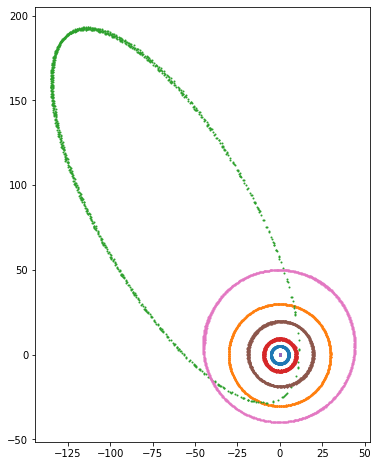

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
for name in np.unique(planets.name):
    plt.scatter(planets[planets.name == name].x, planets[planets.name == name].y, s=1)

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].x, rocks[rocks.name == name].y, s=1)

ax.set_aspect('equal')

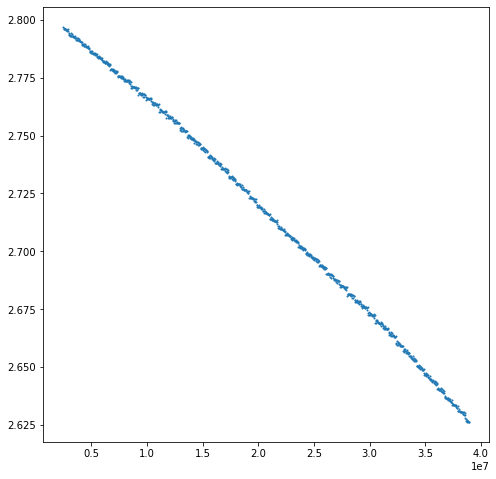

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].epoch.jd, rocks[rocks.name == name].inc.deg, s=1)

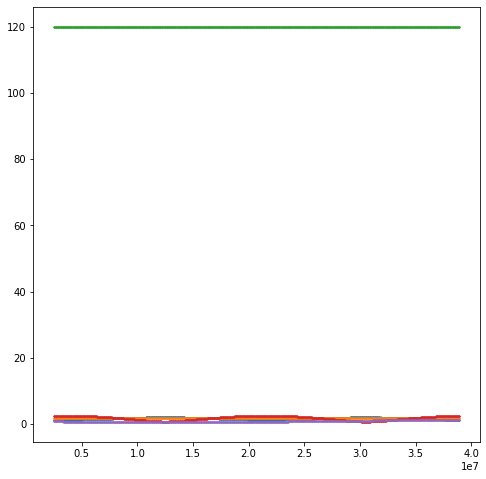

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(planets[planets.name != 'Sun'].name):
    plt.scatter(planets[planets.name == name].epoch.jd, planets[planets.name == name].inc.deg, s=1)

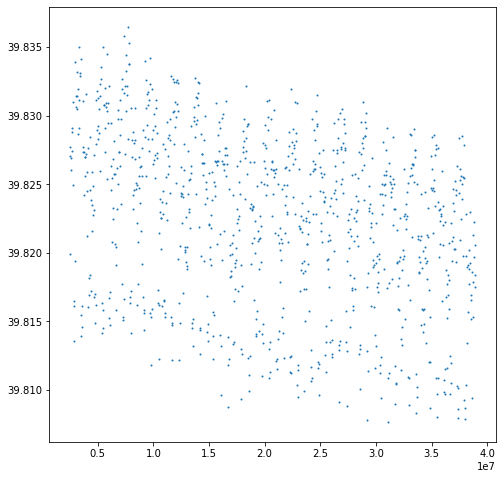

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].epoch.jd, rocks[rocks.name == name].q.au, s=1)